# 加载IMDB数据集

In [2]:
from keras.datasets import imdb

In [10]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)  # ETA表示预计到达时间

In [12]:
train_data[0]  # 评论（单词序列）已经被转换为整数序列，其中每个整数代表字典中的某个单词

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [14]:
train_labels[0]  # 第0条评论情感为积极

1

In [16]:
# 由于限定为前10000个单词，单词索引不会超过10000

In [17]:
max(max(sequence) for sequence in train_data)

9999

In [18]:
# 将某条评论解码为英文单词

In [19]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decodes_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1638400/1641221 [============================>.] - ETA: 0s

# 将整数序列编码为二进制矩阵

In [27]:
import numpy as np

In [28]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # 初始化矩阵
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

In [29]:
# 向量化训练数据和测试数据

In [30]:
x_train = vectorize_sequences(train_data)

In [31]:
x_test = vectorize_sequences(test_data)

In [33]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [34]:
# 将标签向量化

In [35]:
y_train = np.asarray(train_labels).astype('float32')

In [36]:
y_test = np.asarray(test_labels).astype('float32')

# 构建网络

In [98]:
from keras import layers
from keras import  models

In [99]:
model = models.Sequential()

In [100]:
model.add(layers.Dense(units=16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

# 编译模型

In [101]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [102]:
# 还可以自定义配置优化器

In [103]:
from keras import optimizers

In [104]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [105]:
# 使用自定义的损失和指标

In [106]:
from keras import losses
from keras import metrics

In [107]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

# 留出验证集

In [108]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 训练

In [109]:
histroy = model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))  # 当epochs=30时，验证集准确率低于epochs=20的情况

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s - loss: 0.5177 - binary_accuracy: 0.7866 - val_loss: 0.3899 - val_binary_accuracy: 0.8679
Epoch 2/20
15000/15000 [==============================] - 2s - loss: 0.3074 - binary_accuracy: 0.9027 - val_loss: 0.3056 - val_binary_accuracy: 0.8855
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.2266 - binary_accuracy: 0.9263 - val_loss: 0.2942 - val_binary_accuracy: 0.8821
Epoch 4/20
15000/15000 [==============================] - 3s - loss: 0.1771 - binary_accuracy: 0.9429 - val_loss: 0.2793 - val_binary_accuracy: 0.8883
Epoch 5/20
15000/15000 [==============================] - 2s - loss: 0.1443 - binary_accuracy: 0.9539 - val_loss: 0.2969 - val_binary_accuracy: 0.8809
Epoch 6/20
15000/15000 [==============================] - 3s - loss: 0.1182 - binary_accuracy: 0.9635 - val_loss: 0.2905 - val_binary_accuracy: 0.8868
Epoch 7/20
15000/15000 [====================

In [110]:
histroy_dict = histroy.history

In [111]:
histroy_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

# 绘制训练损失和验证损失

In [112]:
import matplotlib.pyplot as plt

In [113]:
histroy_dict = histroy.history
loss_values = histroy_dict['loss']
val_loss_values = histroy_dict['val_loss']

In [114]:
epochs = range(1, len(loss_values) + 1)

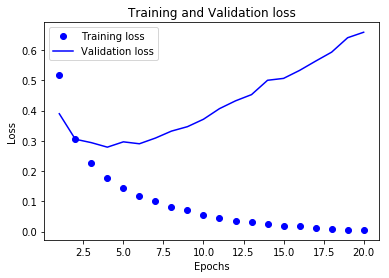

In [115]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 绘制训练精度和验证精度

In [116]:
plt.clf()  # 清空图像

<Figure size 432x288 with 0 Axes>

In [119]:
acc = histroy_dict['binary_accuracy']
val_acc = histroy_dict['val_binary_accuracy']

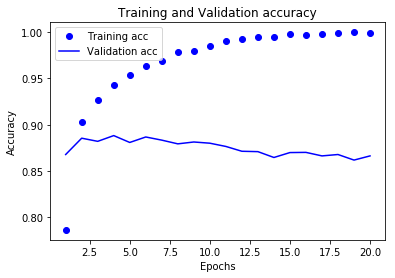

In [120]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 从头开始训练一个新的模型，训练4轮

In [121]:
model = models.Sequential()
model.add(layers.Dense(units=16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [122]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [124]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 3s - loss: 0.4701 - acc: 0.8106     
Epoch 2/4
25000/25000 [==============================] - 3s - loss: 0.2689 - acc: 0.9060     
Epoch 3/4
25000/25000 [==============================] - 3s - loss: 0.2011 - acc: 0.9272     
Epoch 4/4
25000/25000 [==============================] - 3s - loss: 0.1694 - acc: 0.9391     


In [125]:
results = model.evaluate(x_test, y_test)

24864/25000 [============================>.] - ETA: 0s

In [126]:
results

[0.3036538025188446, 0.8814]

In [127]:
# 测试集准确率为88.14%

# 使用训练好的网络在新数据上生成预测结果

In [128]:
# 得到评论为正面的可能性大小

In [130]:
predict = model.predict(x_test)

In [131]:
predict

array([[0.894763  ],
       [0.7344134 ],
       [0.9973133 ],
       ...,
       [0.40440482],
       [0.00143607],
       [0.7033827 ]], dtype=float32)

In [132]:
predict.shape

(25000, 1)